In [1]:
%pylab inline
from scipy.integrate import odeint
from matplotlib import animation

Populating the interactive namespace from numpy and matplotlib


In [2]:
def deriv(f, t, param):
    #unpack variables
    t1    = f[0] #theta1 vars
    t1dot = f[1] #theta1 dot vars
    t2    = f[2] #theta2 vars
    t2dot = f[3] #theta2 dot vars
    l1    = f[4] #l1 vars
    l1dot = f[5] #l1dot vars
    l2    = f[6] #l2 vars
    l2dot = f[7] #l2dot vars
    
    #Unpack constants
    g_d =  param[0]
    m1_d = param[1]
    m2_d = param[2]
    k1_d = param[3]
    k2_d = param[4]
    l_01d= param[5]
    l_02d= param[6]
    
    
    #Write equations
    t1_ddot = (-1/l1)*(2*l1dot*t1dot + g_d*sin(t1) + (k2_d/m1_d)*(l2-l_02d)*sin(t1-t2))
    t2_ddot = (-1/l2)*(2*l2dot*t2dot - (k1_d/m1_d)*(l1-l_01d)*sin(t1-t2))
    l1_ddot = (t1dot**2)*l1 + g_d*cos(t1) - (k1_d/m1_d)*(l1-l_01d) + (k2_d/m1_d)*(l2-l_02d)*cos(t1-t2)
    l2_ddot = (t2dot**2)*l2 - (k2_d/m2_d)*(l2-l_02d) - (k2_d/m1_d)*(l2-l_02d) + (k1_d/m1_d)*(l1-l_01d)*cos(t1-t2)
    
    return [t1dot, t1_ddot, t2dot, t2_ddot, l1dot, l1_ddot, l2dot, l2_ddot]

In [3]:
#Defining Constants
g = 9.8 #gravity
m1 = 1 #mass 1
m2 = 1 #mass 2
k1 = 300 #spring constant 1
k2 = 300 #spring constant 2
L_01 = 1 #spring 1 relaxed length
L_02 = 1 #spring 2 relaxed length

#Initial Conditions
theta1_0 = pi/2
theta1dot_0 = 0
theta2_0 = 0
theta2dot_0 = 0
l1_0 = L_01
l1dot_0 = 0
l2_0 = L_02
l2dot_0 = 0

In [4]:
f_init = [theta1_0, theta1dot_0, theta2_0, theta2dot_0, l1_0, l1dot_0, l2_0, l2dot_0]
param = [g, m1, m2, k1, k2, L_01, L_02]
time = linspace(0, 10, 10000)

f_solun = odeint(deriv, f_init, time, args=(param, ))

#unpack f_solun for ease of use later

theta1 = f_solun[:,0]
theta1dot=f_solun[:,1]
theta2 = f_solun[:,2]
theta2dot=f_solun[:,3]
l1 = f_solun[:,4]
l1dot=f_solun[:,5]
l2 = f_solun[:,6]
l2dot=f_solun[:,7]

In [5]:
%pylab

fig = figure(figsize=(10,10))
ax = axes(xlim=[-3,3], ylim=[-4,4])
grid()

m1_y = -l1*cos(theta1)
m1_x = l1*sin(theta1)
m2_y = m1_y - l2*cos(theta2)
m2_x = m1_x + l2*sin(theta2)

time_per_frame = .04
dstep = max(time)/size(time)
steps_per_frame = time_per_frame/dstep
num_frames = int(max(time)/time_per_frame)


m0_position, = ax.plot([],[], 'go')
m1_position, = ax.plot([],[], 'ro-', ms=15, lw=4)
m2_position, = ax.plot([],[], 'bo-', ms=15, lw=4)

def init():
    m0_position.set_data([], [])
    m1_position.set_data([], [])
    m2_position.set_data([], [])
    return m1_position, m2_position

def animate(i):
    j=i*int(steps_per_frame)
    
    m0_position.set_data(0,0)
    m1_position.set_data([m1_x[j],0], [m1_y[j],0])
    m2_position.set_data([m1_x[j], m2_x[j]], [m1_y[j], m2_y[j]])
    
    return m1_position, m2_position

anim= animation.FuncAnimation(fig, animate, init_func=init, frames=num_frames, interval=50, blit=False)
    


Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


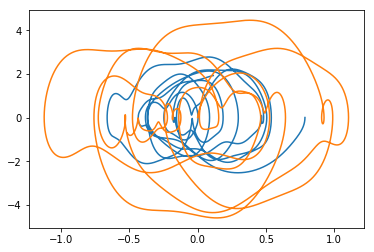

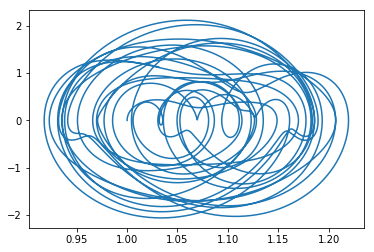

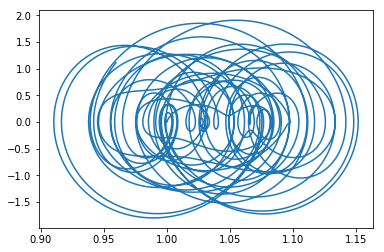

In [23]:
figure(1)
plt.plot(theta1,theta1dot)
plt.plot(theta2,theta2dot)

figure(2)
plt.plot(l1,l1dot)
figure(3)
plt.plot(l2,l2dot)
